In [1]:
from scipy.stats import poisson

In [2]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import poisson
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import random
import glob
import time
import pandas as pd
import math
#import File_functions
plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Thu Jun  9 15:30:21 2022


In [3]:
# this is about the size of dataset I want
index = np.arange(40000000)

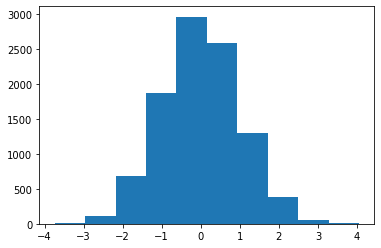

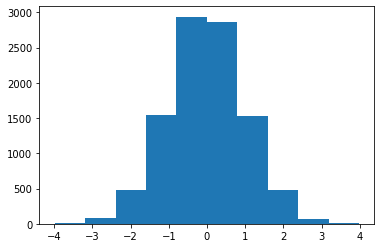

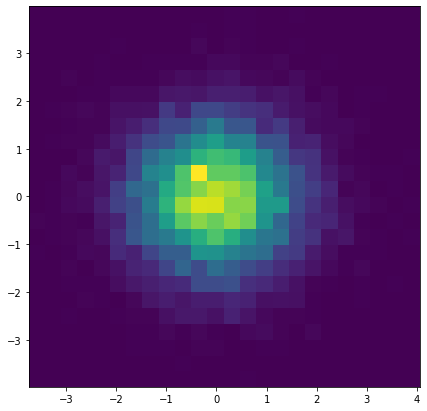

In [4]:
# my first pass at making this data used normal distributions and I'm keeping that process here for posterity
# and also because I use roughly the same process when building more realistic datasets
# and the poisson version is so much simpler and cleaner
# because numpy has lots of tools baked in to make normal distributions

# for ex np.random.randn will just give you a distribution
# here I define it in the x and y directions and then make it into at 2d plot
xpoisson = np.random.randn(10000)
ypoisson = np.random.randn(10000)

plt.hist(xpoisson)
plt.show()

plt.hist(ypoisson)
plt.show()

fig, ax = plt.subplots(figsize =(7, 7));
plt.hist2d(xpoisson, ypoisson, bins =[24, 24]);

In [5]:
# string poissions together into 8 ion chain
allx = []
ally = []


for i in range(0,8):
    xpoisson = np.random.randn(int(10000))
    ypoisson = np.random.randn(int(10000))
    
    allx.append(xpoisson+i*5)
    ally.append(ypoisson)

In [6]:
allx = np.concatenate(allx)
ally = np.concatenate(ally)

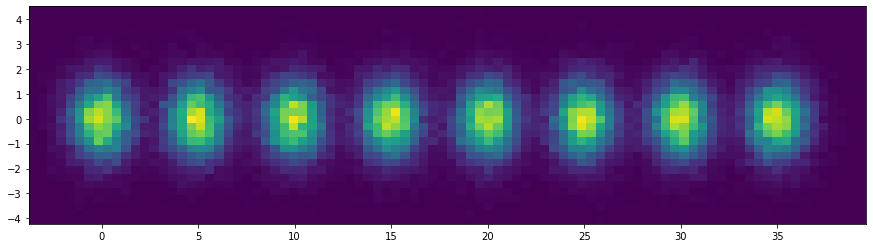

In [7]:
fig, ax = plt.subplots(figsize =(15, 4));
plt.hist2d(allx, ally, bins =[90, 30]);

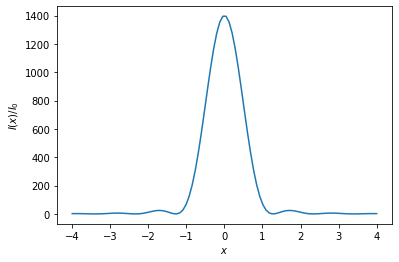

In [8]:
# now we're making something that looks a little more realistic 
# I use the airy disc function to simulate the abberation we get by looking at the light through a lens
t = np.linspace(-4, 4, 100)

xairy =  1400*4*(scipy.special.j1(t*3) / (t*3))**2 
yairy =  1400*4*(scipy.special.j1(t*3) / (t*3))**2 
    
plt.plot(t, xairy)
plt.xlabel('$x$')
plt.ylabel('$I(x)/I_0$')
plt.show()

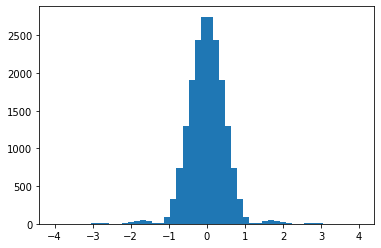

In [9]:
# making that function into a distribution 

xairhist = []
for i in range(len(xairy)): 
    for j in range(0, int(xairy[i])):
        xairhist.append(t[i])
        
#print(xairhist)
plt.hist(xairhist, bins=50);

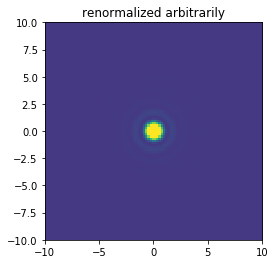

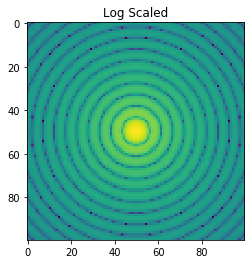

In [10]:
# taking that 1d function and making it radial

xrad = np.linspace(-10,10,100)
yrad = np.linspace(-10,10,100)
xxrad,yyrad = np.meshgrid(xrad,yrad)

radair = 1400*4*(scipy.special.j1(np.sqrt((xxrad)**2 + (yyrad)**2)*3) / (np.sqrt(xxrad**2 + (yyrad)**2)*3))**2 

from matplotlib import colors

#renormalized so that you can see the rings
normal = mpl.colors.Normalize(vmin=-100, vmax=500)

plt.imshow(radair,extent=(-10, 10, -10, 10), norm=normal)
plt.title("renormalized arbitrarily")
plt.show()


plt.imshow(radair, norm=colors.LogNorm())
plt.title("Log Scaled")
plt.show()

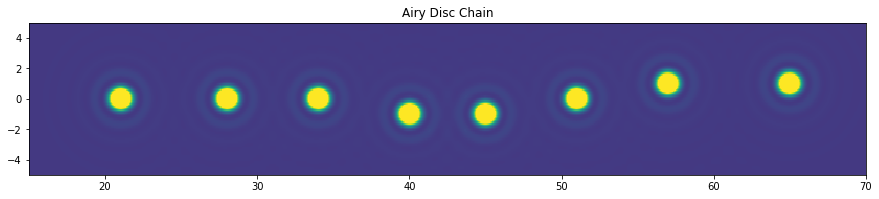

In [11]:
# chaining together with realistic spacing

yrad = np.linspace(-5,5,100)
xrad = np.linspace(-50,5,100*8)
xxrad,yyrad = np.meshgrid(xrad,yrad)

poslistx = [23,31,37,43,48,54,60,67]
# poslisty = [93,93,92,91,91,92,92,92] #these were incorrect

ymid = np.average(poslisty)

radairsingle = 1400*4*(scipy.special.j1(np.sqrt((xxrad+(poslistx[0]-23))**2 + (yyrad)**2)*3) / (np.sqrt((xxrad+(poslistx[0]-23))**2 + (yyrad)**2)*3))**2
radair8 = radairsingle

for i in range(1,8):
    radair8 = radair8 + 1400*4*(scipy.special.j1(np.sqrt((xxrad+(poslistx[i]-23))**2 + (yyrad)**2)*3) / (np.sqrt((xxrad+(poslistx[i]-23))**2 + (yyrad)**2)*3))**2

from matplotlib import colors

#renormalized so that you can see the rings
normal = mpl.colors.Normalize(vmin=-100, vmax=500)

fig, ax = plt.subplots(figsize =(15, 15));
plt.imshow(radair8, extent=(15, 70, -5, 5), norm=normal)
plt.title("Airy Disc Chain")
plt.show()

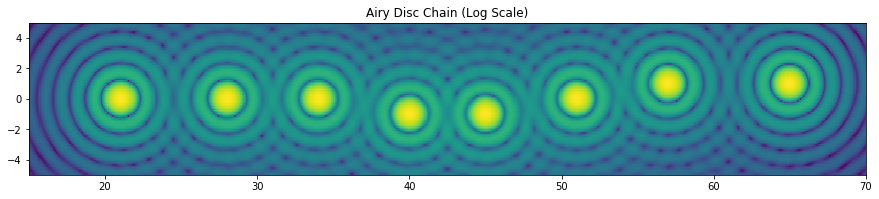

In [12]:
fig, ax = plt.subplots(figsize =(15, 15));
plt.imshow(radair8, extent=(15, 70, -5, 5), norm=colors.LogNorm())
plt.title("Airy Disc Chain (Log Scale)")
plt.show()

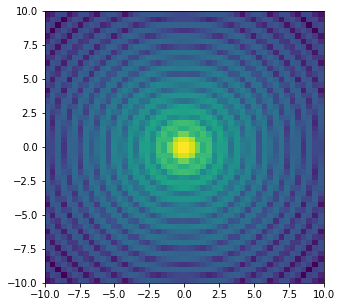

In [13]:
# making that function into a distribution 

# testing first with a single ion
radairhistxsingle = []
radairhistysingle = []

xrad = np.linspace(-10,10,100)
yrad = np.linspace(-10,10,100)
xxrad,yyrad = np.meshgrid(xrad,yrad)
radair = 1400*4*(scipy.special.j1(np.sqrt((xxrad)**2 + (yyrad)**2)*3) / (np.sqrt(xxrad**2 + (yyrad)**2)*3))**2 

for i in range(len(radair[0])): 
    for k in range(len(radair[:,0])):
        for j in range(0, int(radair[k][i]*100)):
            radairhistxsingle.append(xrad[i])
            radairhistysingle.append(yrad[k])
        
#print(xairhist)
fig, ax = plt.subplots(figsize =(5, 5));
plt.hist2d(radairhistxsingle, radairhistysingle, bins=50, norm=colors.LogNorm());

In [14]:
totphotsingle = np.sum(radairhistysingle) + np.sum(radairhistysingle)

In [15]:
# ok now we do the 8 ion chain 

radairhistx = []
radairhisty = []
yrad = np.linspace(-5,5,100)
xrad = np.linspace(15,70,100*8)
xxrad,yyrad = np.meshgrid(xrad,yrad)

for i in range(len(radair8[0])): 
    if i%100 == 0:
        print(i, "milestone. Radair lens are:", len(radairhistx), len(radairhisty))
    for k in range(len(radair8[:,0])):
        for j in range(0, int(radair8[k][i])):
            radairhistx.append(xrad[i])
            radairhisty.append(yrad[k])

0 milestone. Radair lens are: 0 0
100 milestone. Radair lens are: 251973 251973
200 milestone. Radair lens are: 515484 515484
300 milestone. Radair lens are: 798222 798222
400 milestone. Radair lens are: 1073594 1073594
500 milestone. Radair lens are: 1348930 1348930
600 milestone. Radair lens are: 1631390 1631390
700 milestone. Radair lens are: 1884187 1884187


In [16]:
# total photons in a single ion distribution
# it's a surprise tool that will help us later when calculating crosstalk
totphot = np.sum(radairhisty) + np.sum(radairhisty)

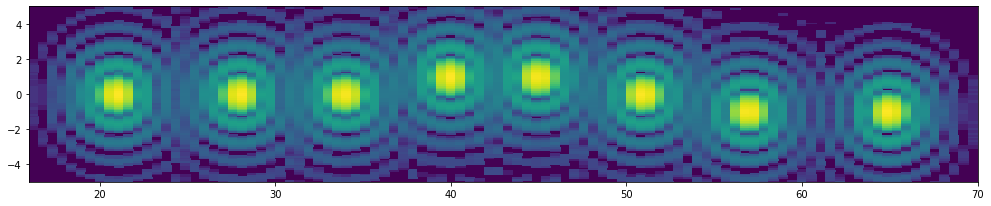

In [17]:
# and finally here's the chain of 8 ions in histogram form
fig, ax = plt.subplots(figsize =(17, 4));
y0 = np.linspace(-200, 200, 100)
x0 = np.linspace(-150,700,100*8)
xx0,yy0 = np.meshgrid(x0,y0)

zeromap = 0*xx0 + 0*yy0
plt.imshow(zeromap, extent=(15, 70, -5, 5))
plt.hist2d(radairhistx, radairhisty, bins=100, norm=colors.LogNorm())
plt.show()

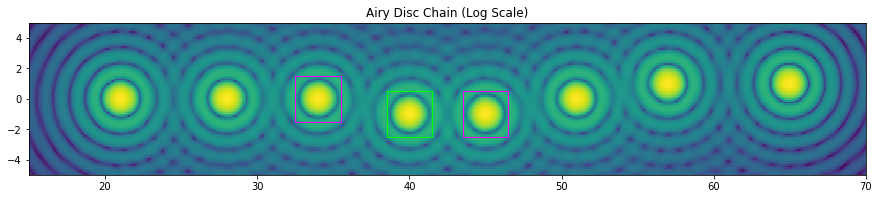

In [18]:
# next thing I want to do is find the crosstalk btwn neighboring ions in this arrangement

# define some regions of interest
import matplotlib.patches as patches

yrad = np.linspace(-5,5,100)
xrad = np.linspace(-50,5,100*8)
xxrad,yyrad = np.meshgrid(xrad,yrad)

area = patches.Rectangle((32.5,-1.5), 3, 3, fill=False, color="fuchsia")
area2 = patches.Rectangle((38.5,-2.5), 3, 3, fill=False, color="lime")
area3 = patches.Rectangle((43.5,-2.5), 3, 3, fill=False, color="fuchsia")

fig, roi = plt.subplots(figsize =(15, 15));
roi.imshow(radair8, extent=(15, 70, -5, 5), norm=colors.LogNorm())
roi.add_patch(area)
roi.add_patch(area2)
roi.add_patch(area3)
plt.title("Airy Disc Chain (Log Scale)")
plt.show()

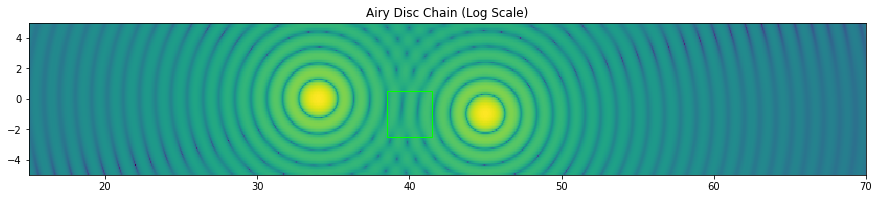

In [19]:
# plotting just two ions to see how they intersect with the central region
area2 = patches.Rectangle((38.5,-2.5), 3, 3, fill=False, color="lime")
radairsingle = 0*1400*4*(scipy.special.j1(np.sqrt((xxrad+(poslistx[0]-23))**2 + (yyrad + (poslisty[0]-ymid))**2)*3) / (np.sqrt((xxrad+(poslistx[0]-23))**2 + (yyrad+ (poslisty[0]-ymid))**2)*3))**2
radneighbors = radairsingle

for i in range(1,8):
    if i == 3 or i==5:
        bonk=1
    else:
        bonk=0
    radneighbors = radneighbors + bonk*1400*4*(scipy.special.j1(np.sqrt((xxrad+(poslistx[i]-23))**2 + (yyrad + (poslisty[i]-ymid))**2)*3) / (np.sqrt((xxrad+(poslistx[i]-23))**2 + (yyrad+ (poslisty[i]-ymid))**2)*3))**2

fig, roi = plt.subplots(figsize =(15, 15));
roi.imshow(radneighbors, extent=(15, 70, -5, 5), norm=colors.LogNorm())
roi.add_patch(area2)
plt.title("Airy Disc Chain (Log Scale)")
plt.show()

0 milestone. Radair lens are: 2145971 2145971
Reached here at least
100 milestone. Radair lens are: 2145971 2145971
200 milestone. Radair lens are: 2145971 2145971
300 milestone. Radair lens are: 2145971 2145971
400 milestone. Radair lens are: 2145971 2145971
500 milestone. Radair lens are: 2145971 2145971
600 milestone. Radair lens are: 2145971 2145971
700 milestone. Radair lens are: 2145971 2145971


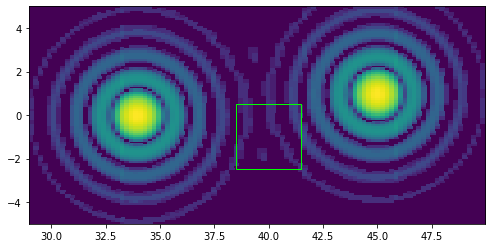

In [20]:
# histogram zone here we go

radairhistxbuds = []
radairhistybuds = []

yrad = np.linspace(-5,5,100)
xrad = np.linspace(15,70,100*8)
xxrad,yyrad = np.meshgrid(xrad,yrad)

for i in range(len(radneighbors[0])): 
    if i==10:
        print("Reached here at least")
    if i%100 == 0:
        print(i, "milestone. Radair lens are:", len(radairhistx), len(radairhisty))
    for k in range(len(radneighbors[:,0])):
        for j in range(0, int(radneighbors[k][i])):
            radairhistxbuds.append(xrad[i])
            radairhistybuds.append(yrad[k])

fig, ax = plt.subplots(figsize =(17, 4));
y0 = np.linspace(-5, 5, 100)
x0 = np.linspace(-50,5,100*8)
xx0,yy0 = np.meshgrid(x0,y0)

area2 = patches.Rectangle((38.5,-2.5), 3, 3, fill=False, color="lime")
zeromap = 0*xx0 + 0*yy0
plt.imshow(zeromap, extent=(15, 70, -5, 5))
ax.hist2d(radairhistxbuds, radairhistybuds, bins=100, norm=colors.LogNorm())
ax.add_patch(area2)
plt.show()

In [21]:
# count the counts in that square
squarex = []
squarey = []

for i in range(len(radairhistxbuds)):
    if radairhistxbuds[i] >= 38.5 and radairhistxbuds[i] <= 41.5:
        squarex.append(radairhistxbuds[i])
for i in range(len(radairhistybuds)):
    if radairhistybuds[i] >= -2.5 and radairhistybuds[i] <= 1.5:
        squarey.append(radairhistybuds[i])

In [22]:
# adding up all the counts in that square 
totphotneighbors = np.sum(squarex) + np.sum(squarey)

In [23]:
# count the counts from the central ion in that box
squarex2 = []
squarey2 = []

for i in range(len(radairhistx)):
    if radairhistx[i] >= 38.5 and radairhistx[i] <= 41.5:
        squarex2.append(radairhistx[i])
for i in range(len(radairhisty)):
    if radairhisty[i] >= -2.5 and radairhisty[i] <= 1.5:
        squarey2.append(radairhisty[i])

In [24]:
# totalling those
totphotcenter = np.sum(squarex2) + np.sum(squarey2)

In [25]:
# bringing together all the various totals to find the difference between the photons we want in that box
# and the photons from neighboring ions
print("Crosstalk in green box: (difference btwn all photons and just ions from other ions in that box)", totphotcenter-totphotneighbors)
print("As a percentage:", totphotneighbors/totphotcenter * 100, "%")

Crosstalk in green box: (difference btwn all photons and just ions from other ions in that box) 9791534.217392953
As a percentage: 2.292517143689445 %


In [26]:
# how much would make 5%? 
fiver = 0.05*totphotcenter
print(fiver)

adds = fiver - totphotneighbors
print(adds)

501063.6816727981
271324.26560979005


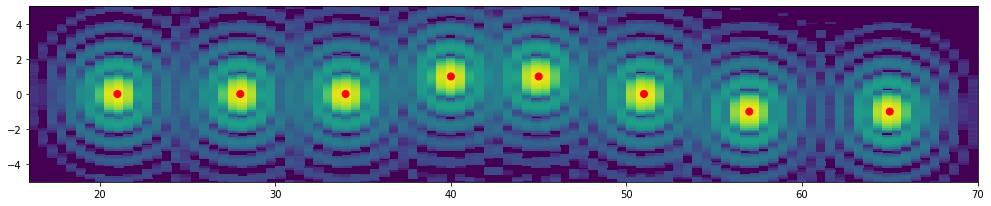

In [27]:
# find places to put artificial crosstalk

fig, ax = plt.subplots(figsize =(17, 4));

ax.imshow(zeromap, extent=(15, 70, -5, 5))
ax.hist2d(radairhistx, radairhisty, bins=100, norm=colors.LogNorm())

circle1 = plt.Circle((21, 0), 0.2, color='r')
ax.add_patch(circle1)
circle2 = plt.Circle((28, 0), 0.2, color='r')
ax.add_patch(circle2)
circle3 = plt.Circle((34, 0), 0.2, color='r')
ax.add_patch(circle3)
circle4 = plt.Circle((40, 1), 0.2, color='r')
ax.add_patch(circle4)
circle5 = plt.Circle((45, 1), 0.2, color='r')
ax.add_patch(circle5)
circle6 = plt.Circle((51, 0), 0.2, color='r')
ax.add_patch(circle6)
circle7 = plt.Circle((57, -1), 0.2, color='r')
ax.add_patch(circle7)
circle8 = plt.Circle((65, -1), 0.2, color='r')
ax.add_patch(circle8)

plt.show()

In [28]:
# make the histogram again but with artificial crosstalk counts

radairhistx = []
radairhisty = []
yrad = np.linspace(-5,5,100)
xrad = np.linspace(15,70,100*8)
xxrad,yyrad = np.meshgrid(xrad,yrad)

for i in range(len(radair8[0])): 
    if i%100 == 0:
        print(i, "milestone. Radair lens are:", len(radairhistx), len(radairhisty))
    for k in range(len(radair8[:,0])):
        for j in range(0, int(radair8[k][i])):
            radairhistx.append(xrad[i])
            radairhisty.append(yrad[k])
            
for i in range(int(adds)):
    radairhistx.append(28)
    radairhisty.append(0)
    radairhistx.append(34)
    radairhisty.append(0)
    radairhistx.append(40)
    radairhisty.append(1)
    radairhistx.append(45)
    radairhisty.append(1)
    radairhistx.append(51)
    radairhisty.append(0)
    radairhistx.append(57)
    radairhisty.append(-1)
    
for i in range(int(adds/2)):
    radairhistx.append(21)
    radairhisty.append(0)
    radairhistx.append(65)
    radairhisty.append(-1)

0 milestone. Radair lens are: 0 0
100 milestone. Radair lens are: 251973 251973
200 milestone. Radair lens are: 515484 515484
300 milestone. Radair lens are: 798222 798222
400 milestone. Radair lens are: 1073594 1073594
500 milestone. Radair lens are: 1348930 1348930
600 milestone. Radair lens are: 1631390 1631390
700 milestone. Radair lens are: 1884187 1884187


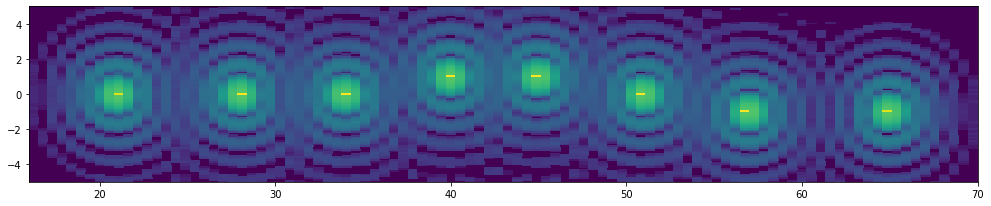

In [29]:
fig, ax = plt.subplots(figsize =(17, 4));

ax.imshow(zeromap, extent=(15, 70, -5, 5));
ax.hist2d(radairhistx, radairhisty, bins=100, norm=colors.LogNorm());

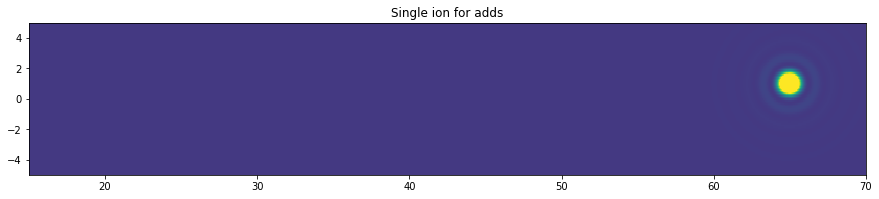

In [52]:
# the code I used to build the full dataset for poissons makes a dataset here that's waaaaaaay too long to handle
# so here's the beginning of my attempt to write a new way of building that dataset
# this code's purpose was to count the photons in each ion so I could figure out how to cut it down
# I tried rebinning the histogram but to get that to work I'd have to also redefine the size of the meshgrid
# so it'll take a little going back and redefining the original intensity distrbution to work without 
# giving you lots of gaps between pixels the way it's set up now

yrad = np.linspace(-5,5,100)
xrad = np.linspace(-50,5,100*8)
xxrad,yyrad = np.meshgrid(xrad,yrad)


# ion 1
radairsingle = 1400*4*(scipy.special.j1(np.sqrt((xxrad+(poslistx[0]-23))**2 + (yyrad + (poslisty[0]-ymid))**2)*3) / (np.sqrt((xxrad+(poslistx[0]-23))**2 + (yyrad+ (poslisty[0]-ymid))**2)*3))**2
ion1 = radairsingle

for i in range(1,8):
    if i == 0:
        bonk=1
    else:
        bonk=0
    ion1 = ion1 + bonk*1400*4*(scipy.special.j1(np.sqrt((xxrad+(poslistx[i]-23))**2 + (yyrad + (poslisty[i]-ymid))**2)*3) / (np.sqrt((xxrad+(poslistx[i]-23))**2 + (yyrad+ (poslisty[i]-ymid))**2)*3))**2

fig, ax = plt.subplots(figsize =(15, 15));
plt.imshow(ion1, extent=(15, 70, -5, 5), norm=normal)
plt.title("Single ion for adds")
plt.show()

# next I was going to turn that single ion into a histogram and count the total counts in the plot
# important to do this with the full size plot because there's exponentially smaller numbers of photons spread
# across the whole width

# then that multiplied by 8 would be the 

In [37]:
# this code is to define when ions are bright and when they're dark
# a random string of 0s and 1s is generated for each ion
# 0 for dark 1 for bright
# then I iterate over these strings and look for spots where neighboring ions are both bright
# i then pick a random one of the pair to be dark instead
# to simulate the effects of crosstalk

timemap = np.zeros((8,int(len(index)/10000)))
randomlist = []
for i in range(0,int(len(index)/10000)):
    for k in range(0,8):
        n = random.randint(0,1)
        randomlist.append(n)
        
    for b in range(1,7):
        while randomlist[b] == randomlist[b-1] == 1 or randomlist[b] == randomlist[b+1] == 1:
            diceroll = random.randint(0,2)
            if diceroll == 0:
                randomlist[b+1] = random.randint(0,1)
            elif diceroll == 1:
                randomlist[b] = random.randint(0,1)
            else:
                randomlist[b-1] = random.randint(0,1)
                
        for j in range(0,8):
            timemap[j][i] = randomlist[j]

In [33]:
# this is my original code for building data
# it works nicely with the poissons but makes a dataset too long with the airy discs
# because they're so much bigger

# the idea is to add all the photon counts for a bright ion for each 1 in each string
# in the appropriate spots

fakedata = []
ionindex = [0, 1, 2, 3, 4, 5, 6, 7]
poslistx = [23,31,37,43,48,54,60,67]
rowmachine = []

for i in range(0,int(len(index)/10000)):
    for j in range(0,8):
        if timemap[j][i] == 1:
            for k in range(0,len(radairhistxsingle)):
                rowmachine.append([0, radairhistysingle[k], radairhistxsingle[k] + poslistx[j], poslistx[j]])
            fakedata.append(rowmachine)
            rowmachine = []

KeyboardInterrupt: 

In [41]:
print(len(radairhistysingle))

4694464


In [ ]:
fakedat = np.concatenate(fakedata)

In [ ]:
np.savetxt('fakedat.csv', fakedat, delimiter=',', header=',y,x,time,center')

In [44]:
22226068/8000

2778.2585

In [45]:
print(np.max(radair))

1336.9374663329636
